In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
import numpy as np
from levels import *
from search_algos import *
import time
%matplotlib inline

startpoints = []
finishpoints = []

for i in range(6):
    startpoints.append(startpoint())
    finishpoints.append(finishpoint())

# Define the colors for the modified blue gradient
colors = ['#A6B5CC', '#008B8B', '#000000', '#FF0000', '#FF00FF']
color_positions = [0.0, 0.8, 0.85, 0.92, 1.0]
# Create a custom colormap using LinearSegmentedColormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_blue_gradient", list(zip(color_positions, colors)))


def printMap(level):
    pixel_plot = plt.figure()
    pixel_plot.add_subplot()
    plt.title("Map")
    pixel_plot = plt.imshow(level, cmap=custom_cmap, interpolation='nearest', origin='upper', vmax=11)
    plt.colorbar(pixel_plot)
    plt.show()

def putPixel(level, position, value):
    x = position[0]
    y = position[1]
    level[y][x] = value

    

In [2]:


def aStar(kierros):
    

    initialState = startpoints[kierros]
    goalState = finishpoints[kierros]


    start_time = time.time()
    goaledNode, openList, closedList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestF)
    #goaledNode, openList, closedList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestH)
    #goaledNode, openList, closedList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestG)
    end_time = time.time()
    execution_time_BestF = end_time - start_time
    name = "A*"
    suoritusaika = (f"{execution_time_BestF:.2f}")

    printpic(putPixel, goaledNode, printMap, openList)

    dataTallennus(openList, closedList, goaledNode, name, suoritusaika)


    # Luetaan CSV-tiedosto DataFrameksi
    df = pd.read_csv("testi.csv")

    # Tulostetaan DataFrame varmistaaksemme, että tiedot on ladattu oikein
    print(df)




In [3]:
def ahnedijkstra(kierros):
    

    initialState = startpoints[kierros]
    goalState = finishpoints[kierros]


    start_time = time.time()
    #goaledNode, openList, closedList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestF)
    goaledNode, openList, closedList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestH)
    #goaledNode, openList, closedList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestG)
    end_time = time.time()
    execution_time_BestF = end_time - start_time
    name = "ahne dijkstra"
    suoritusaika = (f"{execution_time_BestF:.2f}")

    printpic(putPixel, goaledNode, printMap, openList)

    dataTallennus(openList, closedList, goaledNode, name, suoritusaika)


    # Luetaan CSV-tiedosto DataFrameksi
    df = pd.read_csv("testi.csv")

    # Tulostetaan DataFrame varmistaaksemme, että tiedot on ladattu oikein
    print(df)

In [4]:
def leveysuunnattudijkstra(kierros):
    

    initialState = startpoints[kierros]
    goalState = finishpoints[kierros]


    start_time = time.time()
    #goaledNode, openList, closedList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestF)
    #goaledNode, openList, closedList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestH)
    goaledNode, openList, closedList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestG)
    end_time = time.time()
    execution_time_BestF = end_time - start_time
    name = "leveysuunnattu dijkstra"
    suoritusaika = (f"{execution_time_BestF:.2f}")

    printpic(putPixel, goaledNode, printMap, openList)

    dataTallennus(openList, closedList, goaledNode, name, suoritusaika)


    # Luetaan CSV-tiedosto DataFrameksi
    df = pd.read_csv("testi.csv")

    # Tulostetaan DataFrame varmistaaksemme, että tiedot on ladattu oikein
    print(df)

[Source](https://www.youtube.com/watch?v=Q30m_-8nh3Y&list=PLadRxrHJkUqzoVmzO-CQWwhO93IAjChOp&index=18)

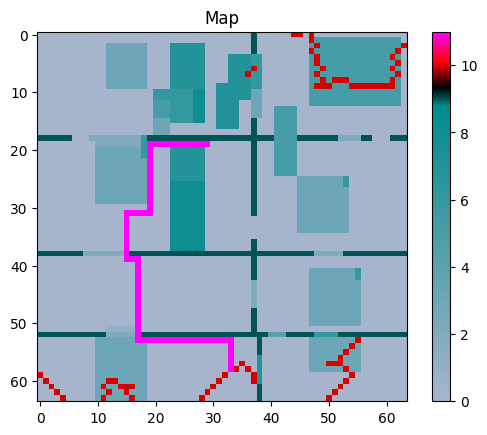

                      nimi suoritusaika kustannus  solmut
0  leveysuunnattu dijkstra         1.17      82.0    7269
                      nimi  suoritusaika  kustannus  solmut
0                       A*          0.11       78.0    2521
1            ahne dijkstra          0.00      134.0     309
2  leveysuunnattu dijkstra          1.11       95.0    7211
3  leveysuunnattu dijkstra          0.11       39.0    2467
4  leveysuunnattu dijkstra          0.48      101.0    4721
5  leveysuunnattu dijkstra          0.24      108.0    3307
6  leveysuunnattu dijkstra          0.02       67.0     877
7  leveysuunnattu dijkstra          0.05       36.0    1341
8  leveysuunnattu dijkstra          1.17       82.0    7269


In [5]:
#aStar(1)
#ahnedijkstra(2)
leveysuunnattudijkstra(3)


#for i in range(5):
    #aStar(i)
    #ahnedijkstra(i)
    #leveysuunnattudijkstra(i)